# Import

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid', {'axes.grid' : False})
%matplotlib inline

# CSV to Pandas

In [341]:
races = pd.read_csv('data/races.csv')
d_standings = pd.read_csv('data/driver_standings.csv')
c_standings = pd.read_csv('data/constructor_standings.csv')
quali = pd.read_csv('data/qualifying.csv')
pit_stops = pd.read_csv('data/pit_stops.csv')
lap_times = pd.read_csv('data/lap_times.csv')
results = pd.read_csv('data/results.csv')
circuits = pd.read_csv('data/circuits.csv')
drivers = pd.read_csv('data/drivers.csv')
constructor = pd.read_csv('data/constructors.csv')
status = pd.read_csv('data/status.csv')

# Data Exploration

In [296]:
pitstops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909
8827,1073,842,2,54,18:25:56,21.920,21920


In [297]:
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021-10-24,19:00:00,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,19,32,Mexico City Grand Prix,2021-10-31,19:00:00,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,20,18,Brazilian Grand Prix,2021-11-07,17:00:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021-12-05,16:00:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


In [298]:
races = races.drop('url', axis=1)
races

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00
...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021-10-24,19:00:00
1054,1070,2021,19,32,Mexico City Grand Prix,2021-10-31,19:00:00
1055,1071,2021,20,18,Brazilian Grand Prix,2021-11-07,17:00:00
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021-12-05,16:00:00


In [299]:
races[races['raceId'] == 1065]

,raceId,year,round,circuitId,name,date,time
1049,1065,2021,14,14,Italian Grand Prix,2021-09-12,13:00:00


In [300]:
races = races[races['year'] >= 2012]

In [301]:
d_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33430,71197,87,42,2.0,22,22,0
33431,71223,88,38,0.0,25,25,0
33432,71224,88,42,2.0,22,22,0
33433,71250,89,38,0.0,25,25,0


In [302]:
c_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12716,27952,71,18,0.0,9,9,0
12717,27962,72,18,0.0,9,9,0
12718,27972,73,18,0.0,9,9,0
12719,27982,74,18,0.0,9,9,0


In [303]:
quali

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


In [304]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909
8827,1073,842,2,54,18:25:56,21.920,21920


In [305]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


In [306]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6
25398,25404,1073,8,51,7,18,\N,R,19,0.0,25,\N,\N,23,18,1:29.698,211.951,23


In [307]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [308]:
drivers = drivers.drop('url', axis=1)
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian


In [309]:
constructor

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [310]:
constructor = constructor.drop('url', axis=1)
constructor

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


In [311]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


In [312]:
eda_df = pd.merge(left=results, right=races, left_on='raceId',
         right_on='raceId', how='left')
eda_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y
0,1,18,1,1,22,1,1,1,1,10.0,...,2,1:27.452,218.300,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,3,1:27.739,217.586,1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,5,1:28.090,216.719,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,7,1:28.603,215.464,1,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,1,1:27.418,218.385,1,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
eda_df = pd.merge(left=eda_df, right=status, left_on='statusId',
                     right_on='statusId', how='left')
eda_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,NaN,NaN,NaN,NaN,NaN,NaN,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,NaN,NaN,NaN,NaN,NaN,NaN,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,NaN,NaN,NaN,NaN,NaN,NaN,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,NaN,NaN,NaN,NaN,NaN,NaN,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,NaN,NaN,NaN,NaN,NaN,NaN,Finished


In [314]:
eda_df = pd.merge(left=eda_df, right=drivers, left_on='driverId',
                     right_on='driverId', how='left')
eda_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,date,time_y,status,driverRef,number_y,code,forename,surname,dob,nationality
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,Finished,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,18,2,2,3,5,2,2,2,8.0,...,NaN,NaN,Finished,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,18,3,3,7,7,3,3,3,6.0,...,NaN,NaN,Finished,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,18,4,4,5,11,4,4,4,5.0,...,NaN,NaN,Finished,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,18,5,1,23,3,5,5,5,4.0,...,NaN,NaN,Finished,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [315]:
eda_df = pd.merge(left=eda_df, right=constructor, left_on='constructorId',
                     right_on='constructorId', how='left')
eda_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverRef,number_y,code,forename,surname,dob,nationality_x,constructorRef,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,mclaren,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,bmw_sauber,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,williams,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,renault,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,mclaren,McLaren,British


In [316]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25400 entries, 0 to 25399
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25400 non-null  int64  
 1   raceId           25400 non-null  int64  
 2   driverId         25400 non-null  int64  
 3   constructorId    25400 non-null  int64  
 4   number_x         25400 non-null  object 
 5   grid             25400 non-null  int64  
 6   position         25400 non-null  object 
 7   positionText     25400 non-null  object 
 8   positionOrder    25400 non-null  int64  
 9   points           25400 non-null  float64
 10  laps             25400 non-null  int64  
 11  time_x           25400 non-null  object 
 12  milliseconds     25400 non-null  object 
 13  fastestLap       25400 non-null  object 
 14  rank             25400 non-null  object 
 15  fastestLapTime   25400 non-null  object 
 16  fastestLapSpeed  25400 non-null  object 
 17  statusId    

In [317]:
eda_df['date'] = pd.to_datetime(eda_df['date'], format='%Y-%m-%d')
eda_df['Year'] = eda_df['date'].dt.year.astype('Int64')

In [318]:
eda_df_copy = eda_df.copy()

In [319]:
eda_df_copy = eda_df_copy.dropna(axis=0)

In [320]:
eda_df_copy['Year']

21229    2012
21230    2012
21231    2012
21232    2012
21233    2012
         ... 
25395    2021
25396    2021
25397    2021
25398    2021
25399    2021
Name: Year, Length: 4165, dtype: Int64

In [321]:
def time_to_int(time):
  if (time == float):
    return time
  time_str = str(time)
  time_series = time_str.rsplit(':')
  if ('\\N' in time_str):
    return None
  if (not '.' in time_str):
    return None
  if (len(time_series) > 1):
    return int(time_series[0]) * 60 + float(time_series[1])
  else:
    return float(time_series[0])

In [322]:
#time_to_int(fastestLapTime)
eda_df_copy['fastestLapTime_int'] = eda_df_copy['fastestLapTime'].apply(time_to_int)
eda_df_copy = eda_df_copy.drop('fastestLapTime', axis=1)

In [323]:
eda_df_copy['fastestLapTime_int'] = eda_df_copy['fastestLapTime_int'].dropna()

In [324]:
eda_df_copy['fastestLapTime_int']

21229    89.187
21230    89.417
21231    89.538
21232    89.438
21233    90.277
          ...  
25395    89.293
25396    89.442
25397    90.647
25398    89.698
25399       NaN
Name: fastestLapTime_int, Length: 4165, dtype: float64

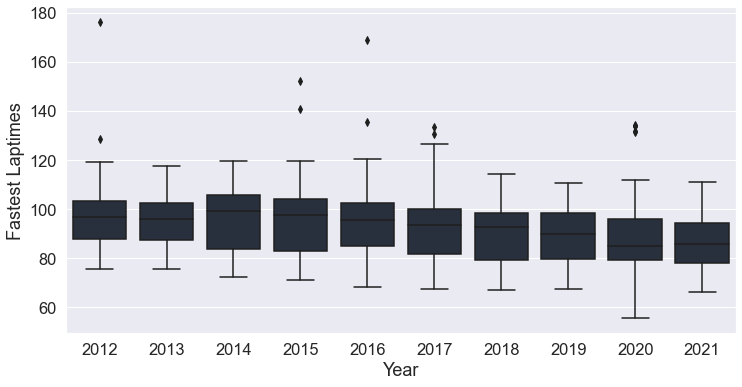

In [325]:
plt.subplots(figsize=(12,6))
ax = sns.boxplot(y= 'fastestLapTime_int',
            x = 'Year',
            data = eda_df_copy,
            color='#242f3f')
ax.set(xlabel = "Year", ylabel = 'Fastest Laptimes')
sns.set(font_scale = 1.5)

In [326]:
rank1 = eda_df[eda_df['positionOrder'] == 1]

In [327]:
rank1

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,number_y,code,forename,surname,dob,nationality_x,constructorRef,name_y,nationality_y,Year
0,1,18,1,1,22,1,1,1,1,10.0,...,44,HAM,Lewis,Hamilton,1985-01-07,British,mclaren,McLaren,British,<NA>
22,23,19,8,6,1,2,1,1,1,10.0,...,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,ferrari,Ferrari,Italian,<NA>
44,45,20,13,6,2,2,1,1,1,10.0,...,19,MAS,Felipe,Massa,1981-04-25,Brazilian,ferrari,Ferrari,Italian,<NA>
66,67,21,8,6,1,1,1,1,1,10.0,...,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,ferrari,Ferrari,Italian,<NA>
88,89,22,13,6,2,1,1,1,1,10.0,...,19,MAS,Felipe,Massa,1981-04-25,Brazilian,ferrari,Ferrari,Italian,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,25306,1070,830,9,33,3,1,1,1,25.0,...,33,VER,Max,Verstappen,1997-09-30,Dutch,red_bull,Red Bull,Austrian,2021
25320,25326,1071,1,131,44,10,1,1,1,25.0,...,44,HAM,Lewis,Hamilton,1985-01-07,British,mercedes,Mercedes,German,2021
25340,25346,1051,1,131,44,1,1,1,1,25.0,...,44,HAM,Lewis,Hamilton,1985-01-07,British,mercedes,Mercedes,German,2021
25360,25366,1072,1,131,44,1,1,1,1,26.0,...,44,HAM,Lewis,Hamilton,1985-01-07,British,mercedes,Mercedes,German,2021


In [330]:
rank1.value_counts(rank1['grid'])

grid
1     446
2     253
3     130
4      65
5      48
6      38
7      22
8      17
10     11
14      6
11      5
9       4
13      4
12      3
16      2
17      2
19      1
15      1
18      1
22      1
dtype: int64

In [358]:
pit_stops = pd.read_csv('data/pit_stops.csv')

In [359]:
pit_stops 

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909
8827,1073,842,2,54,18:25:56,21.920,21920


In [360]:
pit_stops = pit_stops.drop(['lap', 'time', 'duration'], axis=1)

In [361]:
pit_stops

,raceId,driverId,stop,milliseconds
0,841,153,1,26898
1,841,30,1,25021
2,841,17,1,23426
3,841,4,1,23251
4,841,13,1,23842
...,...,...,...,...
8824,1073,815,3,21385
8825,1073,854,2,22070
8826,1073,852,2,21909
8827,1073,842,2,21920


In [362]:
pit_stops['seconds'] = pit_stops['milliseconds'] / 1000
pit_stops['seconds']

0       26.898
1       25.021
2       23.426
3       23.251
4       23.842
         ...  
8824    21.385
8825    22.070
8826    21.909
8827    21.920
8828    69.022
Name: seconds, Length: 8829, dtype: float64

In [351]:
pit_stops = pit_stops.groupby(['raceId', 'driverId']).mean().reset_index()
pit_stops.sort_values(by='seconds', ascending=True)

,raceId,driverId,stop,milliseconds,seconds
401,858,813,1.5,16549.0,16.5490
639,869,18,1.5,17349.0,17.3490
3736,1039,839,1.0,17455.0,17.4550
640,869,20,1.5,17685.5,17.6855
673,870,813,2.0,17755.0,17.7550
...,...,...,...,...,...
2394,967,3,1.5,1745685.5,1745.6855
2408,967,831,1.5,1745710.0,1745.7100
2409,967,832,1.5,1745940.5,1745.9405
2393,967,1,1.5,1746204.5,1746.2045


In [354]:
pit_stops = pit_stops[pit_stops['seconds'] < 60]

In [355]:
pit_stop_df = pd.merge(left=pit_stops, right=eda_df_copy, left_on=['raceId', 'driverId'],
                     right_on=['raceId', 'driverId'], how='right')
pit_stop_df.tail()

,raceId,driverId,stop,milliseconds_x,seconds,resultId,constructorId,number_x,grid,position,...,code,forename,surname,dob,nationality_x,constructorRef,name_y,nationality_y,Year,fastestLapTime_int
4160,1073,849,1.0,21241.0,21.241,25401,3,6,16,\N,...,LAT,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,2021,89.293
4161,1073,841,1.0,22283.0,22.283,25402,51,99,14,\N,...,GIO,Antonio,Giovinazzi,1993-12-14,Italian,alfa,Alfa Romeo,Swiss,2021,89.442
4162,1073,847,NaN,NaN,NaN,25403,3,63,17,\N,...,RUS,George,Russell,1998-02-15,British,williams,Williams,British,2021,90.647
4163,1073,8,1.0,22338.0,22.338,25404,51,7,18,\N,...,RAI,Kimi,Räikkönen,1979-10-17,Finnish,alfa,Alfa Romeo,Swiss,2021,89.698
4164,1073,853,NaN,NaN,NaN,25405,210,9,20,\N,...,MAZ,Nikita,Mazepin,1999-03-02,Russian,haas,Haas F1 Team,American,2021,NaN


In [356]:
pit_stop_df['Year']

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
4160    2021
4161    2021
4162    2021
4163    2021
4164    2021
Name: Year, Length: 4165, dtype: Int64

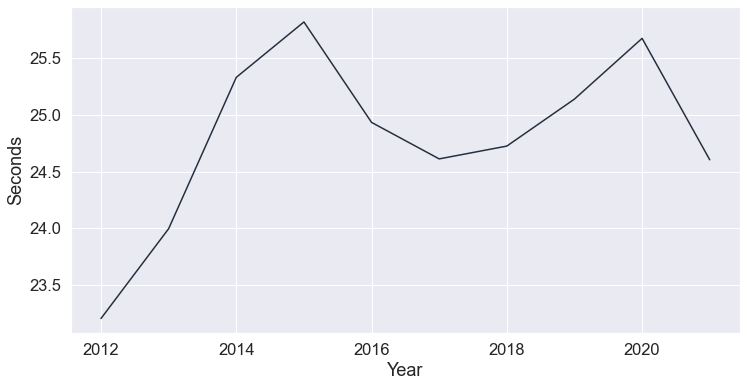

In [364]:
plt.subplots(figsize=(12,6))
ax = sns.lineplot(data = pit_stop_df,
            y = 'seconds',
            x= 'Year',
            color='#242f3f')
ax.set(xlabel = "Year", ylabel = 'Seconds')
sns.set(font_scale = 1.5)